# Dimensionality reduction exercises with the iris dataset

In [178]:
# load the iris dataset (datasets/iris.csv)
# add code here
import pandas as pd

iris_df = pd.read_csv('../../datasets/iris.csv', index_col=0)
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [179]:
# do some exploratory data analysis
# add code here
iris_df.info()
iris_df.describe()
iris_df.duplicated().sum()
iris_df = iris_df.drop_duplicates() #remover dulpicados
iris_df.isnull().sum()  
target = iris_df.Species.values


<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [180]:
# scale the data
# add code here
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
iris_df_scaled = scaler.fit_transform(iris_df.drop('Species', axis=1))
iris_df_scaled = pd.DataFrame(iris_df_scaled, columns=iris_df.columns[:-1])
iris_df_scaled
#escalar os dados e retirar a coluna de string "setosa" para conseguir escalar

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624
...,...,...,...,...
144,1.034197,-0.137353,0.823571,1.454321
145,0.551140,-1.287108,0.710054,0.928046
146,0.792668,-0.137353,0.823571,1.059614
147,0.430375,0.782450,0.937088,1.454321


In [181]:
# perform PCA on the scaled data
# add code here
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_df = pca.fit_transform(iris_df_scaled)

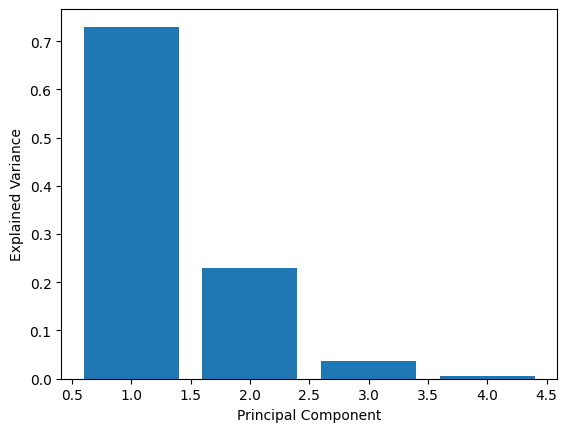

1.0

In [182]:
# plot the explained variance ratio
# add code here
import matplotlib.pyplot as plt

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

sum(pca.explained_variance_ratio_)

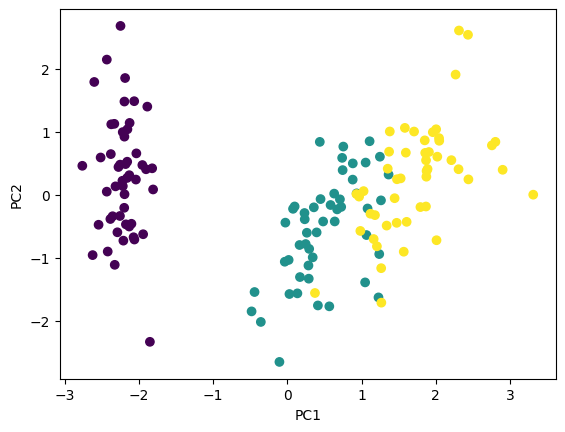

In [183]:
# plot the first two principal components
# add code here
target = pd.Categorical(target).codes # isto foi porque os Species é em String e assim assume que setosa = 1 e virginia = 2 
plt.scatter(pca_df[:,0], pca_df[:,1], c=target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

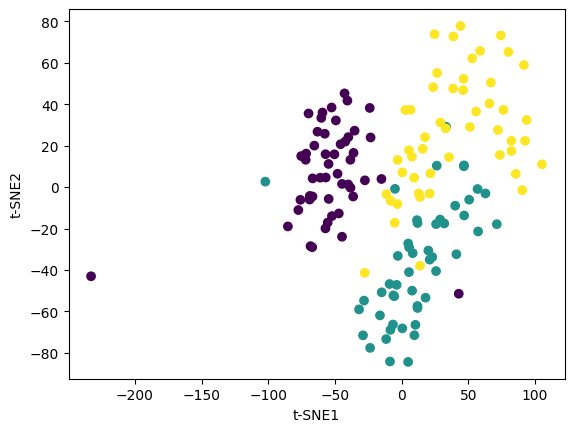

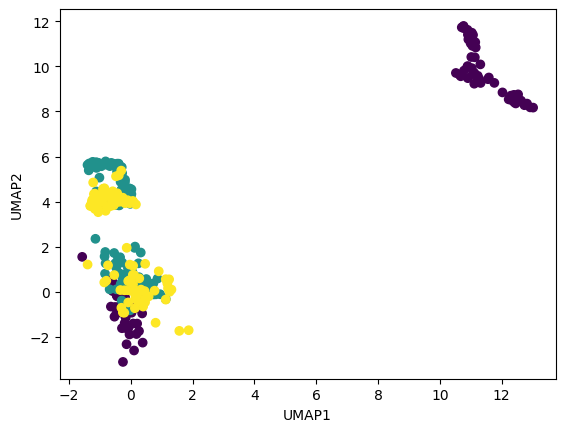

In [184]:
# perform t-SNE, MDS, t-SNE, and UMAP on the scaled data and compare the results
# add code here

## t- SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
df_tsne = tsne.fit_transform(iris_df_scaled)
df_tsne

plt.scatter(df_tsne[:,0], df_tsne[:,1], c=target)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

## MDS
from sklearn.manifold import MDS

mds = MDS(n_components=3)
df_mds = mds.fit_transform(iris_df_scaled)
df_mds

plt.scatter(df_mds[:, 0], df_mds[:, 1], c=target)
plt.xlabel('MDS1')
plt.ylabel('MDS2')

##UMAP

import umap

umap_model = umap.UMAP(n_components=3)
df_umap = umap_model.fit_transform(iris_df_scaled)
df_umap

plt.scatter(df_umap[:,0], df_umap[:,1], c=target)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

In [185]:

# add code here


In [186]:
# add code here


In [187]:
# add code here
